In [3]:
import json
import numpy as np
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
# display(login_times) 
# display(data)

In [4]:
# convert time string to timestamps
from datetime import datetime, timezone,timedelta
import pytz

local_tz = pytz.timezone('Asia/Tehran')
# timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]
# timestamps
timestamps=[(datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc).astimezone(local_tz)+timedelta(hours=-3.5)).timestamp() for i in range(len(login_times))]
# print(timestamps)


# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? it uses strptime to get timestamps

B- What does the concept of "timestamp" mean? What are its type and unit?

C- Is the variable "timestamps" a list or a numpy array?

D- Which day of week (Sunday, Monday, ...) is 1970-01-01?

E- Which function can convert a timestamp back to datetime?


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

# answers


In [5]:
# the first question:
# 1-How many days are there in the data?
import numpy as np
day_number_list=np.array(timestamps).astype(int)//(24*60*60)
days, day_event_counts = np.unique(day_number_list, return_counts=True)
days_in_data=len(days)
print('number of days in data:',days_in_data)

number of days in data: 103


In [6]:
# the second question:
# 2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?
day_number_list=np.array(timestamps).astype(int)//(24*60*60)

days, day_event_counts = np.unique(day_number_list, return_counts=True) 

day_with_maximum_event_index=np.argmax(day_event_counts) 
day_with_second_max_event_index=np.argpartition(day_event_counts.flatten(), -2)[-2]

print("the busiest day is day number ",days[day_with_maximum_event_index])
print("the second busiest day is day number",days[day_with_second_max_event_index])

the busiest day is day number  92
the second busiest day is day number 72


In [7]:
# third question
# 3- Which hour was the busiest hour (the hour with the most requests)?

second_in_day_list=(np.array(timestamps).astype(int)%(24*60*60))
hour_number_list=np.array(second_in_day_list).astype(int)//(60*60)

hours, hour_event_counts = np.unique(hour_number_list, return_counts=True)

hour_with_maximum_event_index=np.argmax(hour_event_counts) 
print("the busiest hour is  ",hours[hour_with_maximum_event_index])

the busiest hour is   19


In [8]:
# 4th question
# 4- Are there any two requests that happened at the same time?
def uni(records_array):
    # np_unique test
    records_array=np.array(records_array).astype(int)

    vals, count = np.unique(records_array, return_counts=True)
    same_timestamp_dict=dict()
    for i in range(len(count)):
        if count[i]>1:
            same_timestamp_dict[vals[i]]=count[i]
    return same_timestamp_dict

print(len(uni(timestamps).keys()))

868


In [9]:
#5th question
# 5- What is the longest gap between two consequent requests?
diff=np.ediff1d(np.array(timestamps))
print(np.amax(np.abs(diff)))

5999.0


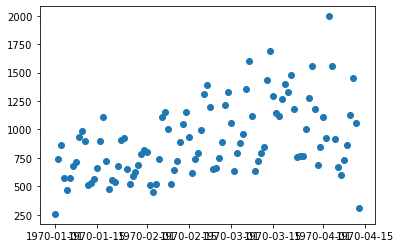

NameError: name 'N' is not defined

<Figure size 432x288 with 0 Axes>

In [10]:
#6th question
# 6- Overall, does the volume of requests increase or decrease over time?
import numpy as np
import matplotlib.pyplot as plt

day_number_list=np.array(timestamps).astype(int)//(24*60*60)
days, day_event_counts = np.unique(day_number_list, return_counts=True)
fig1 = plt.figure()
plt.plot_date(x=days, y=day_event_counts)
plt.show()
fig2 = plt.figure()
a, b = np.polyfit(days[6:], np.convolve(day_event_counts, np.ones(N)/N, mode='valid'), 1)
N=7
plt.plot_date(x=days[6:], y=np.convolve(day_event_counts, np.ones(N)/N, mode='valid'))
plt.plot(days, a*days+b)
plt.show()


In [11]:
#question 7
# 7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
pd_timestamp = [pd.Timestamp((datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc)+timedelta(hours=-3.5)))for i in range(len(login_times))]
df = pd.DataFrame(pd_timestamp,columns=['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['week']=df['timestamp'].dt.week
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df.head(5)

C:\Users\sepehr ahmadi\AppData\Local\Temp\ipykernel_2256\2671539321.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['timestamp'].dt.week


,timestamp,year,month,week,day,weekday,hour,minute,second
0,1970-01-01 16:43:18+00:00,1970,1,1,1,3,16,43,18
1,1970-01-01 16:46:10+00:00,1970,1,1,1,3,16,46,10
2,1970-01-01 16:46:37+00:00,1970,1,1,1,3,16,46,37
3,1970-01-01 16:46:36+00:00,1970,1,1,1,3,16,46,36
4,1970-01-01 16:56:21+00:00,1970,1,1,1,3,16,56,21


In [12]:
df.tail(5)

,timestamp,year,month,week,day,weekday,hour,minute,second
93137,1970-04-13 15:20:19+00:00,1970,4,16,13,0,15,20,19
93138,1970-04-13 15:13:56+00:00,1970,4,16,13,0,15,13,56
93139,1970-04-13 15:24:02+00:00,1970,4,16,13,0,15,24,2
93140,1970-04-13 15:27:38+00:00,1970,4,16,13,0,15,27,38
93141,1970-04-13 15:24:23+00:00,1970,4,16,13,0,15,24,23


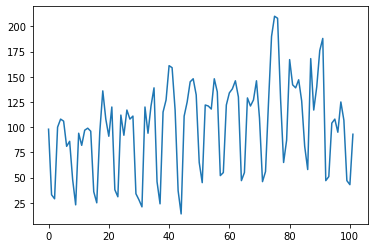

In [13]:
df_6_to_9=df[(df.hour>6) & (df.hour<9)]
# df_6_to_9.head(5)
count6to9=df_6_to_9.groupby(['month', 'day']).count()
count6to9.head()
plt.figure()
plt.plot(list(range(0,102)),count6to9['timestamp'])
plt.show()


In [14]:
# question 8
# 8- Bonus: Which day of week is the busiest?
weekday,weekday_count=np.unique(np.array(df['weekday']),return_counts=True)
print(weekday_count)
print(np.argmax(weekday_count))


[ 9117  9607 10739 12528 17463 19089 14599]
5


In [15]:
#question 9
# 9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.


week,number_of_request_per_week=np.unique(np.array(df['week']),return_counts=True)
print(number_of_request_per_week)


[2436 5248 5005 4749 4825 5498 5918 7058 6554 7353 7410 8918 7306 8041
 6512  311]


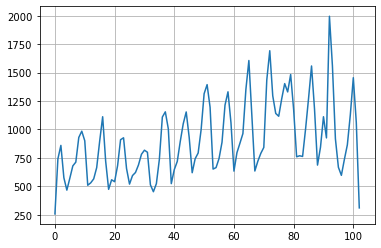

In [16]:
# question 10
# 10- Bonus: Which dates other than the standard weekend days were holidays?
plt.figure()
plt.plot(days,day_event_counts)
plt.grid()
plt.show()

In [29]:
# question 10
# 10- Bonus: Which dates other than the standard weekend days were holidays?
#  Monday=0, Sunday=6

df_workday=df.loc[(df['weekday']==6)|(df['weekday']==5)|(df['weekday']==0)|(df['weekday']==1)|(df['weekday']==4)]
workday_count=df_workday.groupby(['month', 'day']).count()
workday_count_mean=workday_count.mean()['timestamp']
print('work day mean request number:',workday_count_mean)
df_holiday=df.loc[(df['weekday']==2)|(df['weekday']==3)]
holiday_count=df_holiday.groupby(['month', 'day']).count()
holiday_count_mean=holiday_count.mean()['timestamp']
print('holiday mean request number:',holiday_count_mean)
print()
print(holiday_count)
print(workday_count)

work day mean request number: 944.2567567567568
holiday mean request number: 802.3103448275862
           timestamp  year  week  weekday  hour  minute  second
month day                                                      
1     1          258   258   258      258   258     258     258
      7          680   680   680      680   680     680     680
      8          713   713   713      713   713     713     713
      14         566   566   566      566   566     566     566
      15         665   665   665      665   665     665     665
      21         541   541   541      541   541     541     541
      22         682   682   682      682   682     682     682
      28         622   622   622      622   622     622     622
      29         688   688   688      688   688     688     688
2     4          524   524   524      524   524     524     524
      5          737   737   737      737   737     737     737
      11         719   719   719      719   719     719     719
      12 